This project is presented by Racheli Cohen(315247411) and Shayna Shaw(317807451)<br><br>
<B>$28.6 billion was lost to fraud worldwide in 2020, according to Nilson Report.<B>

As long as there’s been currency, there’s been fraud. But not until the 21st century was it so easy for fraudsters to engage in illicit activity, reap the rewards, and evade prosecution and incarceration for their crimes.

Recently, my grandmother went to do her weekly shop at the grocery store, but when she got to the cash register to pay, her credit card didn't go through. From an investigation, it was discovered that there had been a huge transaction from her account, putting her account in a big negative and blocking the use of the card. Finally it turned out that in the same week she donated 1000 dollars to charity, but the clerk who made the transfer accidently transfered 100000 dollars... well, this time it was taken care of and the mistake was corrected Baruch Hashem, but what about all the other cases?? all the times that it is done on purpose and not by accident? This is where we got the idea of our project from, we want to do what we can to help detect and avoid fraud transactions!

In a survey of more than 5,000 respondents across 99 global territories in 2020, PricewaterhouseCoopers (PwC) found that 47 percent had suffered at least one form of fraud in the prior 24 months—averaging six per company. These were commonly customer fraud, cybercrime, asset misappropriation, and bribery and corruption, which cost $42 billion. 

    
We Racheli Cohen and Shayna Shaw In this project will try to tackle this problem and help it by creating an Autoencoder Neural Network (implemented in Keras) for Anomaly Detection in credit card transaction data. The trained model will be evaluated on pre-labeled and anonymized dataset.

Let’s dive deeper in!

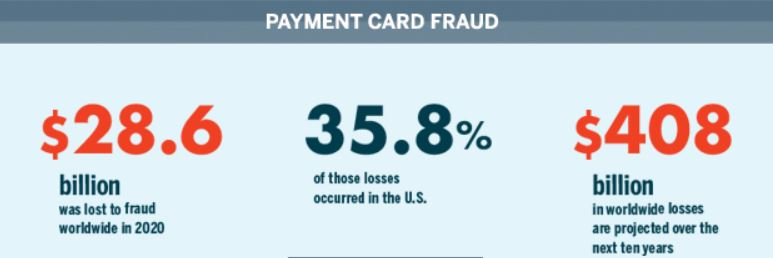

<br>
<h2>Imports

In [2]:
# DataFrame, data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Tensorflow + Keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np # linear algebra
import os
from collections import Counter
import logging
import time
import pickle
import itertools
from scipy import stats
import seaborn as sns
from pylab import rcParams


<h2><b>Loading the data set<b>


The dataset we are going to be using can be downloaded from Kaggle:<br> 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud<br>
The dataset contains transactions made by credit cards in September 2013 by European cardholders, it contains data about credit card transactions that occurred during a period of two days, with 492 frauds out of 284,807 transactions.<br>
The data has been transformed using PCA transformation(s) due to privacy reasons, as expected.  the only features which have not been transformed with PCA are 'Time' and 'Amount':<br>
<b>Time</b> - contains the seconds elapsed between each transaction and the first transaction in the dataset<br>
<b>Amount</b> - contains the transaction Amount<br>
<b>Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise</b><br>
these are going to be the features that we will work with.

In [3]:
dataset_filename = os.listdir("Input")[0]
dataset_path = os.path.join("Input",dataset_filename)
print("Open file:", dataset_path)
df = pd.read_csv(dataset_path)

Open file: Input\creditcard.csv


Lets take a sneak peek at what our data looks like, we can see the time, amount and class columns as explained above.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<br>Check for NULL values

In [5]:
df.isnull().values.any()

False

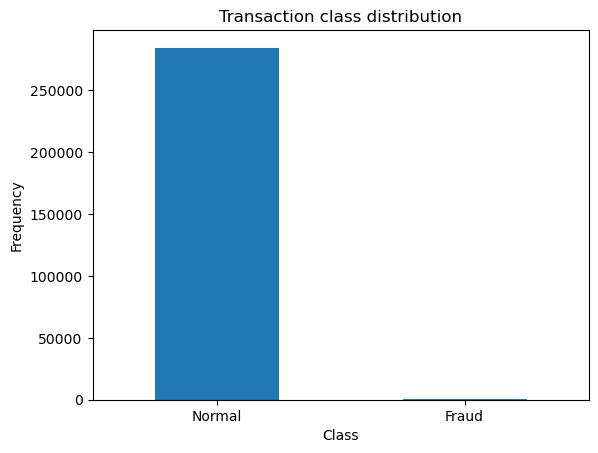

In [7]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency");

Notice how the data is totally unbalanced, We can see that an overwhelming majority of the transactions are non-fraud. If we use this dataframe for predicting we might get a lot of errors and our algorithms will probably overfit by assuming that most transactions are not fraud. so we will want to balance our dataset before making any predictions.

In [25]:
fraud = df[df.Class == 1]
normal = df[df.Class == 0]
print(f'Normal transactions: {len(normal)} out of {len(df)}, {round(len(normal)/len(df) * 100,3)} % of the dataset')
print(f'Fraud transactions:  {len(fraud)} out of {len(df)}, {round(len(fraud)/len(df) * 100,3)} % of the dataset')

Normal transactions: 284315 out of 284807, 99.827 % of the dataset
Fraud transactions:  492 out of 284807, 0.173 % of the dataset


<h2>*** learn more about our data, compare Fraud/Normal features time and amount to see what we can learn about our data***

<h2><b>Pre-process our data

First, we will scale Time and Amount like the other columns, using sklearn's StandardScaler.
.



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = df.drop('Class', axis=1)
y = df.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)


We have divided our data into training, validation and testing groups. sum(training+validation+testing) = sum(df)

In [49]:
print(f"TRAINING:\n     x_train: {X_train.shape[0]}\n     y_train: {y_train.shape[0]}\n")
print(f"VALIDATION:\n     x_validate: {X_validate.shape[0]}\n     y_validate: {y_validate.shape[0]}\n")
print(f"TESTING:\n     x_test: {X_test.shape[0]}\n     y_test: {y_test.shape[0]}\n")

TRAINING:
     x_train: 159491
     y_train: 159491

VALIDATION:
     x_validate: 39873
     y_validate: 39873

TESTING:
     x_test: 85443
     y_test: 85443



In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_result(label, prediction, train=True):
    print(f"Train Result:\nAccuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
    report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
    print(f"Classification Report:\n{report}")
    if train:
        print(f"Confusion Matrix: {confusion_matrix(y_train, prediction)}\n")
    else:
        print(f"Confusion Matrix: {confusion_matrix(label, prediction)}\n") 

<h2>*** continue processing our data, need to equalize the data, work on balancing the data... then would probably need to fix what wrote above and reference it to the new balanced dataset***

Once we finished preprocessing our data - we are off to building our model!

<h2><b>Building our model using Keras!


<b>eather use the functional model: (work on it...fix)

In [73]:
input_layer = Input(shape=(X_train.shape[-1], ))

encoder = Dense(256, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(256, activation="relu")(encoder)

decoder = Dense(256, activation='tanh')(encoder)
decoder = Dense(X_train.shape[-1], activation='relu')(decoder)

func_model = Model(inputs=input_layer, outputs=decoder)

func_model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_48 (Dense)            (None, 256)               7936      
                                                                 
 dense_49 (Dense)            (None, 256)               65792     
                                                                 
 dense_50 (Dense)            (None, 256)               65792     
                                                                 
 dense_51 (Dense)            (None, 30)                7710      
                                                                 
Total params: 147,230
Trainable params: 147,230
Non-trainable params: 0
_________________________________________________________________


In [76]:
func_model.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

In [81]:
callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]

history = func_model.fit(X_train, X_train,
                    epochs=10,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=callbacks).history

Epoch 1/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5375 - accuracy: 0.9125 - val_loss: 0.5418 - val_accuracy: 0.8973
Epoch 2/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5385 - accuracy: 0.9139 - val_loss: 0.5189 - val_accuracy: 0.9271
Epoch 3/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5354 - accuracy: 0.9134 - val_loss: 0.5173 - val_accuracy: 0.9376
Epoch 4/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5344 - accuracy: 0.9175 - val_loss: 0.5158 - val_accuracy: 0.9182
Epoch 5/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5353 - accuracy: 0.9160 - val_loss: 0.5202 - val_accuracy: 0.9155
Epoch 6/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5335 - accuracy: 0.9171 - val_loss: 0.5189 - val_accuracy: 0.9113
Epoch 7/10
4985/4985 [==============================] - 20s 4ms/step - loss: 0.5320 - accuracy: 0.9162 - val_loss: 0.5176 - val_ac

we can see the the loss rate is high, seems like it is because our data is still unbalanced and in addition we need to still eork more on our model... those are our plans for the upcoming weeks:) 

<b>or use the sequential model:(work on it...fix)

In [67]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()
keras.utils.plot_model(model)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               7936      
                                                                 
 batch_normalization_18 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_19 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 256)              

<h2>*** continue building the model </h2>(plot_model doesnt work yet..)***

<h2>*** work on compile fit predict***

As you can see, there is a lot more work to be done on this project, that is our plan for the upcoming weeks:)...